# Supervised Machine Learning Algorithms

# 1- K Nearest Neighbors (KNN)


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [21]:
dataset = pd.read_csv("C:\\Users\Mohsen\Desktop\Supervised_ML\diabetes.csv")
print(len(dataset))
dataset.head()

768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Make a list of columns which zero values are not accepted for their elements
Non_Zero_Columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [4]:
# Replace zeroes
for column in Non_Zero_Columns:
    dataset[column] = dataset[column].replace(0,np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

In [5]:
# Split data
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [12]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Initialize KNN clasifier
knn = KNeighborsClassifier(n_neighbors=11, p=2, metric = 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [14]:
# Predict the test set results
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [15]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[86 13]
 [21 34]]


In [16]:
print(f1_score(y_test, y_pred))

0.6666666666666667


In [11]:
print(accuracy_score(y_test, y_pred))

0.7792207792207793


# 2- Linear Regression


In [58]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
# Importing the dataset
companies = pd.read_csv(r"C:\Users\Mohsen\Desktop\Supervised_ML\1000_Companies.csv")
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [111]:
# Extracting the Independent and Dependent variables
X = companies.iloc[:,0:4].values
y = companies.iloc[:,4].values

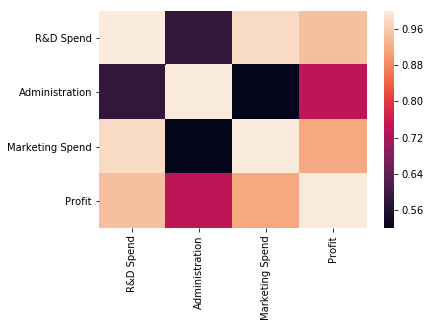

In [112]:
# Data Visualization
# Building the Correlation Matrix

sns.heatmap(companies.corr())

In [113]:
# Unique Values in Column 3
companies.iloc[:,3].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [114]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [115]:
# Spliting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [116]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [123]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred[0:10])

[ 84889.96878531  76375.62868937 158442.50842633 154618.23175524
  51390.21484387  52325.67288525  93090.20595033 153779.15600107
  96962.70750829  53165.25183681]


In [124]:
# Calculating the coefficients
print(regressor.coef_)

[ 9.50625437e+01 -4.88704163e+02  3.93641619e+02  6.18686589e-01
  8.72708710e-01  5.85558720e-02]


In [125]:
# Calculating the Intercept
print(regressor.intercept_)

-51667.73982950489


In [126]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9078326035850637

# 3- Logistic Regression

In [5]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [211]:
# Importing the dataset
titanic_data = pd.read_csv(r"C:\Users\Mohsen\Desktop\Supervised_ML\Titanic.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
print("Number of passengers in the Titanic dataset: " + str(len(titanic_data)))

Number of passengers in the Titanic dataset: 891


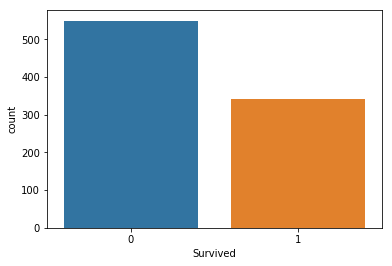

In [10]:
# Analyzing Data
sns.countplot(x = "Survived", data = titanic_data)

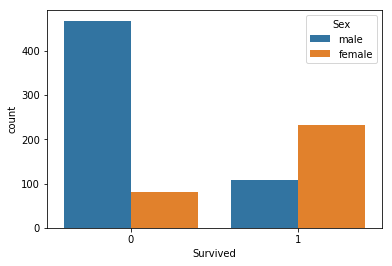

In [11]:
# Analyzing data based on sex
sns.countplot(x = "Survived", hue = "Sex", data = titanic_data)

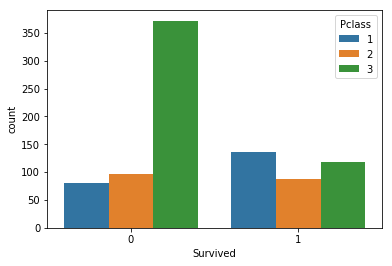

In [13]:
# Analyzing data based on passenger class
sns.countplot(x = "Survived", hue = "Pclass", data = titanic_data)

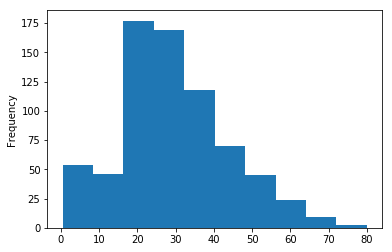

In [31]:
# Analyzing age of passengers regardless of survival status
titanic_data["Age"].plot.hist()

In [139]:
# Seperating survived from not survived people based on their ages
Survived_Age = []
Not_Survived_Age = []

for index, item in enumerate(titanic_data["Age"]):
    if titanic_data["Survived"][index] == 1:
        Survived_Age.append(item)
    elif titanic_data["Survived"][index] == 0:
        Not_Survived_Age.append(item)
    else:
        print("Survival status is unknown")

In [154]:
# Removing NaN data
Survived_Age = [item for item in Survived_Age if str(item) != 'nan']
Not_Survived_Age = [item for item in Not_Survived_Age if str(item) != 'nan']

(array([ 18.,  16.,  99., 110.,  64.,  45.,  38.,  15.,  13.,   6.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <a list of 10 Patch objects>)

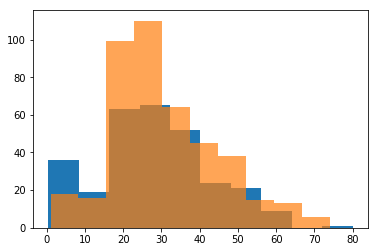

In [163]:
# Analyzing age of passengers regardling their survival status.
# Note It's not always wise to remove NaN data without any examination and further study.

plt.hist(Survived_Age) # Blue Histogram
plt.hist(Not_Survived_Age, alpha = 0.7) # Orange Histogram

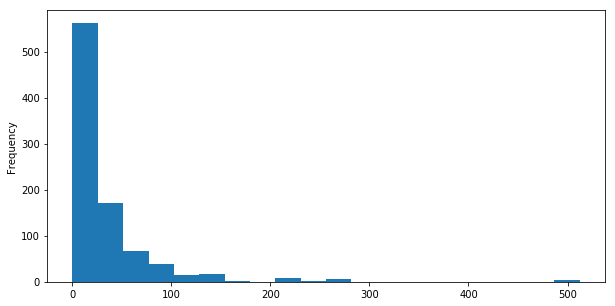

In [168]:
# Analyzing data based on Fare
titanic_data["Fare"].plot.hist(bins = 20, figsize=(10,5))

In [169]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


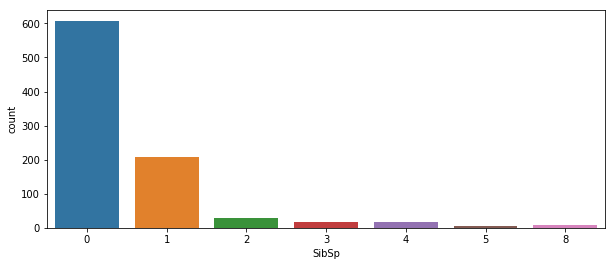

In [177]:
plt.figure(figsize=(10, 4))
sns.countplot(x = "SibSp", data = titanic_data, )

In [180]:
# Data Wrangling
titanic_data.isnull().sum() # Shows how many data is NaN for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

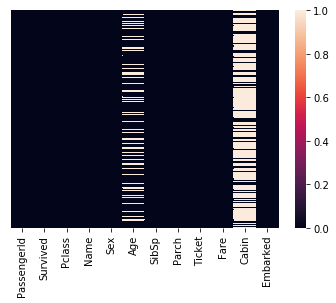

In [192]:
# Using heatmap to visualize NaN values for each column
sns.heatmap(titanic_data.isnull(), yticklabels = False)

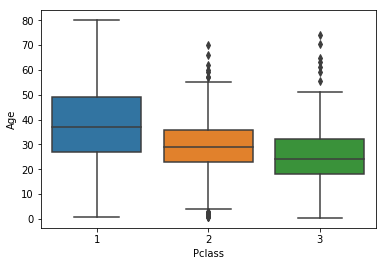

In [193]:
sns.boxplot(x = "Pclass", y = "Age", data = titanic_data)

In [212]:
titanic_data.drop("Cabin", axis = 1, inplace = True)

In [213]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [214]:
titanic_data.dropna(inplace = True)

In [215]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S


In [216]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [217]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [222]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [223]:
embark = pd.get_dummies(titanic_data["Embarked"], drop_first = True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [224]:
pclass = pd.get_dummies(titanic_data["Pclass"], drop_first = True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [225]:
titanic_data = pd.concat([titanic_data, sex, embark, pclass], axis = 1)

In [226]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [241]:
titanic_data.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [242]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [243]:
# Train and Test Data
# Build the model on the train data and predict the output on the test data

X = titanic_data.drop("Survived", axis = 1)
y = titanic_data["Survived"]

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [247]:
from sklearn.linear_model import LogisticRegression

In [248]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [249]:
pred = LR_model.predict(X_test)

In [253]:
from sklearn.metrics import classification_report
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.83      0.82       126\n           1       0.75      0.72      0.73        88\n\n   micro avg       0.79      0.79      0.79       214\n   macro avg       0.78      0.77      0.78       214\nweighted avg       0.78      0.79      0.78       214\n'

In [256]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred) 

# true negative = 105, true positive = 63, false positive = 21, false negative = 25

array([[105,  21],
       [ 25,  63]], dtype=int64)

In [257]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7850467289719626

# 4- Support Vector Machines (SVMs)


In [53]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
# Creating a pandas data frame out of the iris data
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
# target number 1 starts from index # 50 AND target number 2 starts from index # 100.
df[df['target'] == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [52]:
# Adding flower name column into the data frame
df['flower_name'] = df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [69]:
# Spliting the dataframe into 3 sub-dataframe
df0 = df[df['target']==0]
df1 = df[df['target']==1]
df2 = df[df['target']==2]

Text(0, 0.5, 'sepal length (cm)')

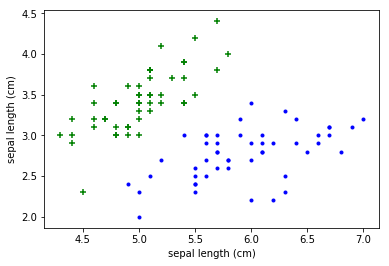

In [92]:
# Ploting df0 and df1 against each other baesd on sepal features
plt.scatter(x = df0['sepal length (cm)'], y = df0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(x = df1['sepal length (cm)'], y = df1['sepal width (cm)'], color = 'blue', marker = '.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal length (cm)')

Text(0, 0.5, 'petal length (cm)')

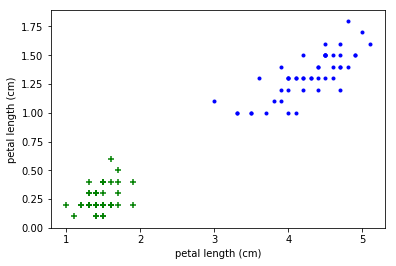

In [93]:
# Ploting df0 and df1 against each other baesd on petal features
plt.scatter(x = df0['petal length (cm)'], y = df0['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(x = df1['petal length (cm)'], y = df1['petal width (cm)'], color = 'blue', marker = '.')
plt.xlabel('petal length (cm)')
plt.ylabel('petal length (cm)')

In [95]:
# Train and Test the model
from sklearn.model_selection import train_test_split
X = df.drop(['target', 'flower_name'], axis = 'columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [96]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
len(X_train)

120

In [98]:
# Import the Support Vector Machine classifier and make the model
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [100]:
pred = model.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred) 


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [99]:
# Look at the accuracy of the model
model.score(X_test, y_test)

0.9666666666666667

# 5- Decision Trees and Random Forests

In [104]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
np.random.seed(0)

In [106]:
# Creating an object called iris
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [108]:
#  Convert the data to a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Viewing the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [118]:
# Adding a new column for the species name
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [124]:
# Creating train and test data set
df['train'] = np.random.uniform(0,1, len(df)) <= 0.75
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [127]:
# Spliting train and test data set
train, test = df[df['train']==True], df[df['train']==False]

print("Number of observations in the train data set: " + str(len(train)))
print("Number of observations in the test data set: " + str(len(test)))

Number of observations in the train data set: 110
Number of observations in the test data set: 40


In [130]:
# Create a list of the feature column's names
features = df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [138]:
# Convert each species name into digits
y = pd.factorize(train['species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [139]:
# Creating a random forest classifier
clf = RandomForestClassifier(n_jobs = 2, random_state = 1)
# Training the classifier using train data set
clf.fit(train[features], y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [141]:
# Applying the trained classifier to the test
pred = clf.predict(test[features])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2], dtype=int64)

In [142]:
y_test = pd.factorize(test['species'])[0]
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [146]:
# Viewing the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.6, 0.4, 0. ],
       [0.6, 0.4, 0. ],
       [1. , 0. , 0. ],
       [0.6, 0.4, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ]])

In [156]:
# Mapping names for the plants for each predicted plant class
preds = iris.target_names[clf.predict(test[features])]
preds[0:10]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [157]:
# Viewing the actual species for the first five observations
test['species'].head(10)

2     setosa
5     setosa
10    setosa
14    setosa
15    setosa
16    setosa
18    setosa
19    setosa
24    setosa
28    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [143]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred) 


array([[15,  0,  0],
       [ 1, 10,  1],
       [ 0,  2, 11]], dtype=int64)

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9

In [160]:
# Creating confusion matrix
pd.crosstab(test['species'], preds, rownames = ['Actual Species'], colnames = ['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,15,0,0
versicolor,1,10,1
virginica,0,2,11


# 6- Naive Bayes

In [4]:
# Loading the necessary libraries
import numpy as np
import pandas as pd
import urllib

import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
raw_data = urllib.request.urlopen(url)

# with urllib.request.urlopen("http://www.python.org") as url:
#     s = url.read()
#     # This would output the html source code ?
#     print(s)

# type(raw_data.read())
dataset = np.loadtxt(raw_data, delimiter=',')
print(dataset[0])

[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


In [21]:
# Features and Target - Target 1 means it's an spam and 0 means it's not an spam email.
X = dataset[:,0:48]
y = dataset[:,-1]

In [22]:
# Spliting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [24]:
# Training the classifier and check accuracy of the model using Bernoulli NB
BernNB = BernoulliNB(binarize = True)
BernNB.fit(X_train, y_train)
print(BernNB)

pred = BernNB.predict(X_test)
print(accuracy_score(y_test, pred))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.8580738595220855


In [26]:
# Training the classifier and check accuracy of the model using Multinomial NB
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)

pred = MultiNB.predict(X_test)
print(accuracy_score(y_test, pred))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.8747284576393918


In [27]:
# Training the classifier and check accuracy of the model using Multinomial NB
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)

pred = GausNB.predict(X_test)
print(accuracy_score(y_test, pred))

GaussianNB(priors=None, var_smoothing=1e-09)
0.8052136133236785


In [33]:
# Try and Error to find a better "bernoulize" value
BernNB = BernoulliNB(binarize = 0.4)
BernNB.fit(X_train, y_train)
print(BernNB)

pred = BernNB.predict(X_test)
print(accuracy_score(y_test, pred))

BernoulliNB(alpha=1.0, binarize=0.4, class_prior=None, fit_prior=True)
0.9015206372194062


In [34]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred) 

array([[793,  48],
       [ 88, 452]], dtype=int64)